In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.insert(1, '/home/a/a270230/LKF/lkf_tools/lkf_tools/')
from dataset import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/work/bk1377/a270230/'
path_nc   = path + 'interpolated_fesom_output/4km/'
path_lkfs = path + 'dump/'
path_ds   = path + 'datasets/'

In [3]:
years = [2099]
days = np.arange(0,350,50)

In [4]:
%%time
lkfs = []
for year in years:
    for day in days:

        lkf_data = process_dataset(netcdf_file = path_nc + f'{year}_4km.nc',
                                   output_path = path_lkfs,
                                   dog_thres = 0.01,
                                   t_red = 1)

        lkf_data.detect_lkfs(indexes=[day])

        lkfs += np.load(lkf_data.lkfpath.joinpath('lkf_%s_%03i.npy' %(lkf_data.netcdf_file.split('/')[-1].split('.')[0],(day+1))),allow_pickle=True),


        #np.save(path_ds + f'ds_{year}_km', [lkf_data])

  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 1


Start detection routines
  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 51
Start detection routines
  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 101
Start detection routines
  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 151
Start detection routines
  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 201
Start detection routines
  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 251
Start detection routines
  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 301
Start detection routines
CPU times: user 4min 26s, sys: 6min 32s, total: 10min 58s
Wall time: 11min 3s


In [7]:
# for one year:
# 12:22 mins for optimize2
# 10:43 mins for jax2
# 13:40 min for package

# 2099
# 13:09 package
# 11:03 jax2

In [5]:
np.save('lfks_jax2_2099y', lkfs)

In [7]:
jax2 = np.load('lfks_jax2.npy', allow_pickle=True)
jax299 = np.load('lfks_jax2_2099y.npy', allow_pickle=True)
opt2 = np.load('lfks_optimize2_1y.npy', allow_pickle=True)
pck = np.load('lfks_package_1y.npy', allow_pickle=True)
pck2 = np.load('lfks_package_2099y.npy', allow_pickle=True)

In [8]:
n,m = [], []
for timen, timem in zip(pck2, jax299):
    n += len(timen),
    m += len(timem),

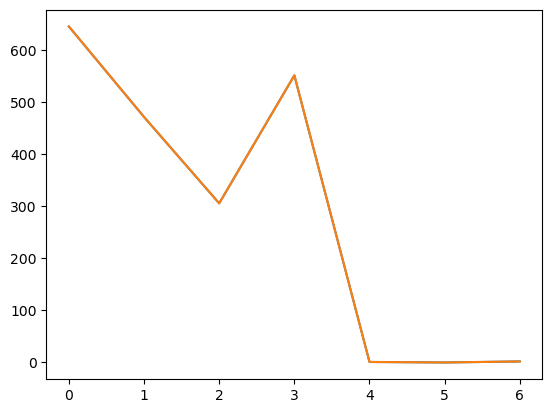

In [11]:
plt.plot(n)
plt.plot(m)

In [22]:
#optimize2 does not work for no lkfs detected (like day 250 in 2099)
# jax2 same result as package in 2013 and 2099 but 20% faster

In [12]:
# package works in 2099 i.e. also when no lkfs are detected!!!